In [ ]:
# Import required libraries .
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score

In [89]:
# Making own dataset using datasets import
X , y = make_regression(n_features=1,n_informative=1,n_samples=100,n_targets=1,noise=17,random_state=42)

In [90]:
# At the first stage we did the whole flow with X and y but LATER we needed to check the accuracy and cross val score of
# both the models so we will proceed with train test split
X_train , X_test , y_train ,y_test = train_test_split( X , y , test_size=0.2 , random_state=2)

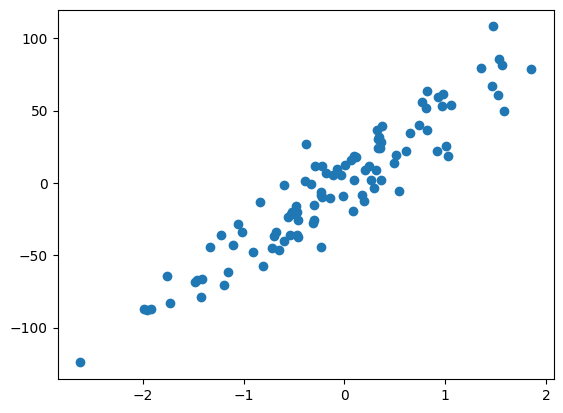

In [ ]:
plt.scatter(X,y) # Plot the graph to visualize the point
plt.show()

In [ ]:
lr = LinearRegression() # Instanitate the model

In [ ]:
lr.fit(X_train,y_train)  # The fitting parameters


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
lr.coef_,lr.intercept_ # The coeffecients and intercept values of the model.

(array([45.84220294]), np.float64(1.9306614851805342))

In [ ]:
y_pred_lr = lr.predict(X_test) # We store this prediction for model comparission .

In [96]:
# Fixing slope for gradient descent first step
m = lr.coef_[0]

In [ ]:
# This step is just for intuition only on how the variables are updated using gradient descent .
class GradientDescentRegression:
    def __init__(self,m,b,learning_rate,epochs):
        self.m = m
        self.b = b
        self.l = learning_rate
        self.epochs = epochs
    
    def fit(self,X_train,y_train):
        for i in range(self.epochs):
            loss_slope = -2 * (np.sum(y_train - (self.m*X_train.ravel()) - self.b))
            step_size = loss_slope * self.l
            self.b = self.b - step_size
            print(f"Iteration : {i+1} \n Current loss_slope = {loss_slope} \n Current b value = {self.b} ")


In [98]:
model = GradientDescentRegression(m=m,b=0,learning_rate=0.001,epochs=50) # Adjusted epochs and learning rate value

In [ ]:
model.fit(X_train,y_train)
# Here iteration was done using epochs to reach a intercept value close to the model.

Iteration : 1 
 Current loss_slope = -308.9058376288853 
 Current b value = 0.3089058376288853 
Iteration : 2 
 Current loss_slope = -259.4809036082637 
 Current b value = 0.568386741237149 
Iteration : 3 
 Current loss_slope = -217.9639590309416 
 Current b value = 0.7863507002680906 
Iteration : 4 
 Current loss_slope = -183.08972558599078 
 Current b value = 0.9694404258540814 
Iteration : 5 
 Current loss_slope = -153.7953694922323 
 Current b value = 1.1232357953463137 
Iteration : 6 
 Current loss_slope = -129.1881103734751 
 Current b value = 1.2524239057197888 
Iteration : 7 
 Current loss_slope = -108.51801271371914 
 Current b value = 1.3609419184335079 
Iteration : 8 
 Current loss_slope = -91.15513067952413 
 Current b value = 1.452097049113032 
Iteration : 9 
 Current loss_slope = -76.5703097708002 
 Current b value = 1.5286673588838322 
Iteration : 10 
 Current loss_slope = -64.31906020747218 
 Current b value = 1.5929864190913043 
Iteration : 11 
 Current loss_slope = -5

In [ ]:
# Note all the steps are done assuming that slope is constantly taken from the start and not calculated iteratively . 
# Now we will be calculating the value with both b and m by taking both arbitarily values at the start.
# We will get 2 loss functions and both the values of m and b for each iteration from now on.
# This is how actually how Gradient Descent should work.

In [ ]:
# The full step is exactly the same but the only difference is for the slope's loss function
# an extra X value need to be multiplied before proceeding .
class GDR:
    def __init__(self,m,b,learning_rate,epochs):
        self.m = m
        self.b = b
        self.l = learning_rate
        self.epochs = epochs
    
    def fit(self,X_train,y_train):
        for i in range(self.epochs):
            loss_slope_b = -2 * (np.sum(y_train - (self.m*X_train.ravel()) - self.b))
            step_size_b = loss_slope_b * self.l
            self.b = self.b - step_size_b
            
            # Extra X term which was derived while finding partial derivative of E with respect to slope.
            loss_slope_m = -2 * (np.sum((y_train - (self.m*X_train.ravel()) - self.b)*X_train.ravel())) 
            step_size_m = loss_slope_m * self.l
            self.m = self.m - step_size_m

        print(f"Iteration : {i+1} \n Current loss_slope_b = {loss_slope_b} \n Current b value = {self.b} ")
        print(f"Iteration : {i+1} \n Current loss_slope_m = {loss_slope_m} \n Current m value = {self.m} ")
    
    def predict(self,X):
        return self.m*X + self.b


In [ ]:
model = GDR(m=100,b=0,learning_rate=0.001,epochs=50) # Instantiating with appropriate parameters ; needs experimenting

In [103]:
print(f"Actual Values using OLS: \n Slope : 45.84220294 \n Intercept : 1.9306614851805342")

Actual Values using OLS: 
 Slope : 45.84220294 
 Intercept : 1.9306614851805342


In [104]:
model.fit(X_train,y_train)

Iteration : 50 
 Current loss_slope_b = 2.741051402385949 
 Current b value = 1.950149078677853 
Iteration : 50 
 Current loss_slope_m = 6.907919723553977 
 Current m value = 45.88858445445077 


In [ ]:
y_pred = model.predict(X_test) # Make predictions using model.

In [ ]:
# Now lets calculate the r2 score  of both the models
r2_score_lr = r2_score(y_pred_lr,y_test)
r2_score_model = r2_score(y_pred,y_test)

In [ ]:
r2_score_lr,r2_score_model # Our model has a greater score.

(0.882615071702703, 0.8829687487446989)